In [7]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.ticker as mticker
import numpy as np
import cartopy.crs as ccrs

**Griding and Plotttin EECRA** </br>
In this text file, JJA 1952 is gridded and plotted using the -180 to 180 lon. </br>
Grid EECRA 02 was made because of difficulty showing the full map and invalid values at the same time.

In [ ]:
path = "data/EECRA/ocean_seasonal/"
df = pd.read_csv(path+'df_JJA52.csv')
df['Lon'] = ((df['Lon'] + 180) % 360) -180

df_counts = df.loc[df["CL"].notna()]
lat_counts = df_counts['Lat']
lon_counts = df_counts['Lon']

df_fog= df.loc[df["CL"] == 11]
lat_fog = df_fog['Lat']
lon_fog = df_fog['Lon']


In [ ]:
lat_bins = np.arange(-90, 91, 5)
lon_bins = np.arange(-180, 181, 5)

In [10]:
#counts of LC observations
counts_LC, lat_edges, lon_edges = np.histogram2d(lat_counts, lon_counts, bins=[lat_bins, lon_bins])

#counts of fog
counts_fog, lat_edges, lon_edges = np.histogram2d(lat_fog, lon_fog, bins=[lat_bins, lon_bins])

#where there are less than 10 LC observations, the value is nan
counts_probOccurance_real = np.where(counts_LC <= 10, np.nan, counts_fog / counts_LC)

/var/folders/4m/h1r7bv6s65ggpt8gzk616wyh0000gn/T/ipykernel_51346/3992391576.py:8: RuntimeWarning: invalid value encountered in divide
  counts_probOccurance_real = np.where(counts_LC <= 10, np.nan, counts_fog / counts_LC)


In [11]:
"""# 5x5 grid of where LC observations have been taken

lon_grid, lat_grid = np.meshgrid(lon_edges, lat_edges)

fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})

mesh = ax.pcolormesh(
    lon_grid,
    lat_grid,
    counts_fog,
    cmap='hot_r',
    shading='auto',
    transform=ccrs.PlateCarree()
)

# Add coastlines and gridlines
ax.coastlines(linewidth=0.5)
gl = ax.gridlines(draw_labels=True, linewidth=0.3, color='gray', alpha=0.7, linestyle='--')
gl.right_labels = False
gl.top_labels = False

# Add colorbar
cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', pad=0.03, aspect=30)
cbar.set_label("Observation Count")

# Add title
ax.set_title("EECRA 1952 JJA 5°x5° Gridded Count of Fog Observations", fontsize=14)

plt.tight_layout()
plt.show()"""

'# 5x5 grid of where LC observations have been taken\n\nlon_grid, lat_grid = np.meshgrid(lon_edges, lat_edges)\n\nfig, ax = plt.subplots(figsize=(12, 6), subplot_kw={\'projection\': ccrs.PlateCarree(central_longitude=180)})\n\nmesh = ax.pcolormesh(\n    lon_grid,\n    lat_grid,\n    counts_fog,\n    cmap=\'hot_r\',\n    shading=\'auto\',\n    transform=ccrs.PlateCarree()\n)\n\n# Add coastlines and gridlines\nax.coastlines(linewidth=0.5)\ngl = ax.gridlines(draw_labels=True, linewidth=0.3, color=\'gray\', alpha=0.7, linestyle=\'--\')\ngl.right_labels = False\ngl.top_labels = False\n\n# Add colorbar\ncbar = plt.colorbar(mesh, ax=ax, orientation=\'vertical\', pad=0.03, aspect=30)\ncbar.set_label("Observation Count")\n\n# Add title\nax.set_title("EECRA 1952 JJA 5°x5° Gridded Count of Fog Observations", fontsize=14)\n\nplt.tight_layout()\nplt.show()'

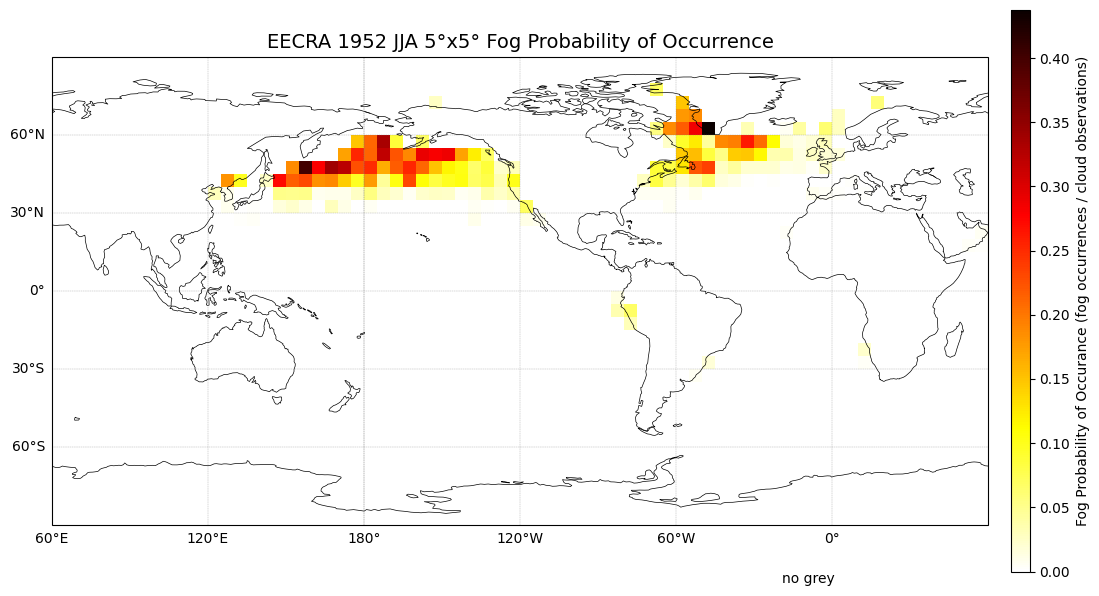

In [ ]:
#grid of fog probability of occurance without gray
#  that is number of fog observations / total observations
#  where there are at least 10 observations

lon_grid, lat_grid = np.meshgrid(lon_edges, lat_edges)

fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=240)})

#masked = np.ma.masked_invalid(counts_probOccurance_real)

cmap = plt.get_cmap('hot_r')
#cmap.set_bad('darkgray', 1)
mesh = ax.pcolormesh(
    lon_grid,
    lat_grid,
    counts_probOccurance_real,
    cmap=cmap,
    shading='auto',
    transform=ccrs.PlateCarree()
)

# Add coastlines and gridlines
ax.coastlines(linewidth=0.5)
gl = ax.gridlines(draw_labels=True, linewidth=0.3, color='gray', alpha=0.7, linestyle='--')
gl.right_labels = False
gl.top_labels = False

# Add colorbar
cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', pad=0.02, aspect=30)
cbar.set_label("Fog Probability of Occurance (fog occurrences / cloud observations)")

# Add title
ax.set_title("EECRA 1952 JJA 5°x5° Fog Probability of Occurrence", fontsize=14)

fig.text(0.7, 0.02, "no grey", fontsize=10, ha="right")

plt.tight_layout()
plt.savefig("dataViz/EECRA_52JJA_FPO_noFog.png")
plt.show()